In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Definining functions for problem 6

In [2]:
#event likely to have occured if r * dt > 0.5.
#Note: gauranteed to have occured for too large of chosen dt
#basically works best for r * dt << 1
def occurred(r, dt):
    return np.random.uniform() < r * dt

#for small enough time intervals dt, this should give distribution
#similar to poisson distribution in total time T
#works best for r * dt << 1 and dt << T
def occurrences(r, dt, T):
    successes = 0
    num_intervals = int(T / dt)
    for i in range(num_intervals):
        successes += occurred(r, dt)
    return successes

#Actual Poisson function
#probability that k events occur in interval dt (seconds per interval) if they occur at rate r (events per second)
def poisson(r, T, k):
    return np.exp(-r * T) * (r * T)**k / np.math.factorial(k)

# time between occurences
def tau(r, dt):
    if r * dt < 1 / 10000:
        raise ValueError('this is going to take too long.')
    success = False
    t = -1 * dt
    while not success:
        t += dt
        success = occurred(r, dt)
    return t

def prob_tau(r, t):
    return r * np.exp(- r * t)

## Problem 6a

In [3]:
r_1 = 0.1
dt_1 = 1
T = 100
samples = 500
occurrences_1 = [occurrences(r_1, dt_1, T) for item in range(samples)]

In [4]:
print('mean: ' + str(np.mean(occurrences_1)))
print('expected mean (r * T): ' + str(r_1 * T))

print('variance: ' + str(np.var(occurrences_1) * samples / (samples - 1)))
print('expected variance (r * T): ' + str(r_1 * T))

mean: 9.78
expected mean (r * T): 10.0
variance: 8.45651302605
expected variance (r * T): 10.0


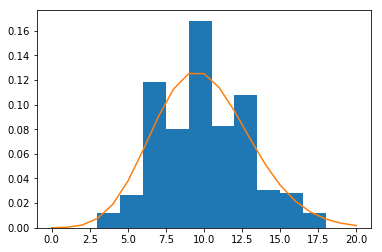

In [5]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(occurrences_1, normed=True)

x = range(21)
y = [poisson(r_1, T, item) for item in x]
ax1.plot(x, y)

## Problem 6b

### Set I: r = 10.0

In [6]:
r_2 = 10.0
dt_2 = 0.05
samples = 500
taus_2 = [tau(r_2, dt_2) for item in range(samples)]

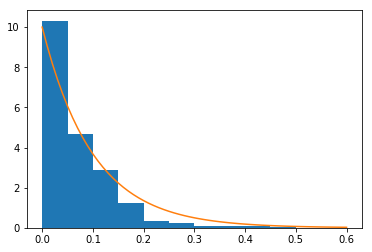

In [7]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)

n, bins, rectangles = ax1.hist(taus_2, normed=True)

x = list(np.arange(0, 0.61, 0.01))
y = [prob_tau(r_2, item) for item in x]

ax1.plot(x, y)

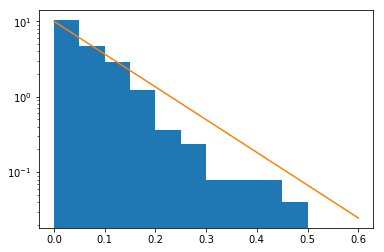

In [8]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.yscale('log')
n, bins, rectangles = ax1.hist(taus_2, normed=True)

x = list(np.arange(0, 0.61, 0.01))
y = [prob_tau(r_2, item) for item in x]

ax1.plot(x, y)

### Set II: r = 0.1

In [9]:
r_3 = 0.1
dt_3 = 0.05
T = 100
samples = 500
taus_3 = [tau(r_3, dt_3) for item in range(samples)]

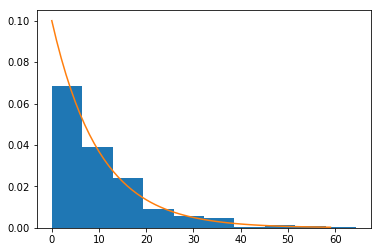

In [10]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
n, bins, rectangles = ax1.hist(taus_3, normed=True)

x = list(np.arange(0, 60, 1))
y = [prob_tau(r_3, item) for item in x]

ax1.plot(x, y)

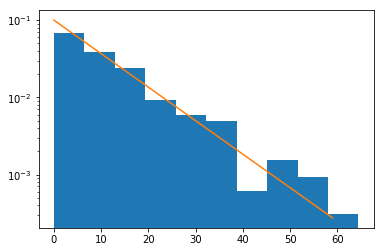

In [11]:
plt.clf()
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.yscale('log')
n, bins, rectangles = ax1.hist(taus_3, normed=True)

x = list(np.arange(0, 60, 1))
y = [prob_tau(r_3, item) for item in x]

ax1.plot(x, y)